In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
columns = ["User_id", "item_id", "Rating", "TimeStamp"]

In [3]:
data = pd.read_csv("u.data", sep="\t", names = columns)

In [4]:
data.head()

,User_id,item_id,Rating,TimeStamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [5]:
movies_id = pd.read_csv("Movie_Id_Titles")

In [6]:
movies_id.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [7]:
data = pd.merge(data, movies_id, on="item_id")

In [8]:
data.head()

,User_id,item_id,Rating,TimeStamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [9]:
data.groupby("title")["Rating"].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: Rating, dtype: float64

In [10]:
data.groupby("title")["Rating"].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: Rating, dtype: int64

In [11]:
rating = pd.DataFrame(data.groupby("title")["Rating"].mean())

In [12]:
rating.head()

,Rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [13]:
rating["num_rating"] = data.groupby("title")["Rating"].count()

In [14]:
rating.head()

,Rating,num_rating
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


<AxesSubplot:>

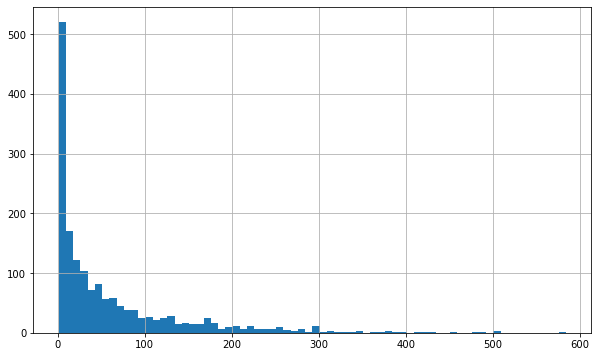

In [15]:
plt.figure(figsize=(10,6))
rating["num_rating"].hist(bins=70)

<AxesSubplot:>

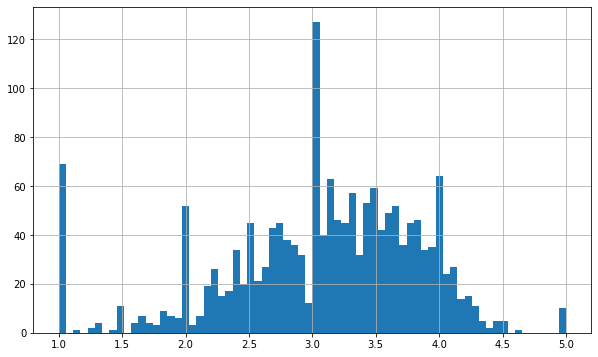

In [16]:
plt.figure(figsize=(10,6))
rating["Rating"].hist(bins=70)

<Figure size 720x1440 with 0 Axes>

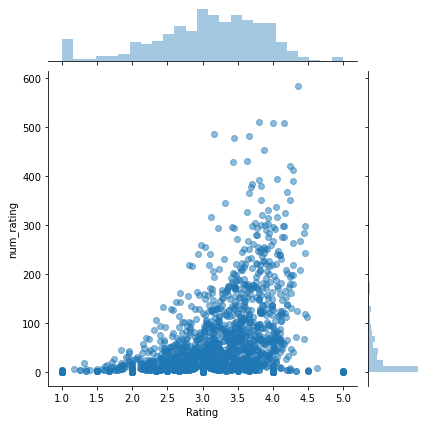

In [17]:
plt.figure(figsize=(10,20))
sns.jointplot(x="Rating",y= "num_rating" ,data = rating, alpha = 0.5)

In [18]:
data.columns

Index(['User_id', 'item_id', 'Rating', 'TimeStamp', 'title'], dtype='object')

In [19]:
moviemat = data.pivot_table(index="User_id", columns="title", values="Rating")

In [20]:
moviemat.head(5)

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
User_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
rating.sort_values("num_rating", ascending=False).head()

,Rating,num_rating
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [66]:
Star_Wars_rating = moviemat["Star Wars (1977)"]
Liar_Liar_rating = moviemat["Liar Liar (1997)"]

In [67]:
similar_to_start_war = moviemat.corrwith(Star_Wars_rating)
similar_to_Liar_Liar = moviemat.corrwith(Liar_Liar_rating)

In [68]:
corr_StarWar = pd.DataFrame(similar_to_start_war, columns=["Correlation"])
corr_StarWar.dropna(inplace=True)

In [69]:
corr_StarWar.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [70]:
corr_StarWar = corr_StarWar.join(rating["num_rating"]) # for every movie bring the rating number for it 
corr_StarWar.head()

,Correlation,num_rating
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [72]:
corr_StarWar[corr_StarWar["num_rating"] > 100].sort_values("Correlation", ascending=False).head()

,Correlation,num_rating
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [73]:
corr_Liar_Liar = pd.DataFrame(similar_to_Liar_Liar, columns=["Correlation"])
corr_Liar_Liar.dropna(inplace=True)

In [74]:
corr_Liar_Liar.head()

,Correlation
title,
'Til There Was You (1997),0.118913
101 Dalmatians (1996),0.469765
12 Angry Men (1957),0.066272
187 (1997),0.175145
2 Days in the Valley (1996),0.040739


In [75]:
corr_Liar_Liar = corr_Liar_Liar.join(rating["num_rating"]) # for every movie bring the rating number for it 
corr_Liar_Liar.head()

,Correlation,num_rating
title,,
'Til There Was You (1997),0.118913,9
101 Dalmatians (1996),0.469765,109
12 Angry Men (1957),0.066272,125
187 (1997),0.175145,41
2 Days in the Valley (1996),0.040739,93


In [76]:
corr_Liar_Liar[corr_Liar_Liar["num_rating"] > 100].sort_values("Correlation", ascending=False).head()

,Correlation,num_rating
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137


## Looking for more?

If you want to tackle your own recommendation system analysis, check out these data sets. Note: The files are quite large in most cases, not all the links may stay up to host the data, but the majority of them still work. Or just Google for your own data set!

**Movies Recommendation:**

MovieLens - Movie Recommendation Data Sets http://www.grouplens.org/node/73

Yahoo! - Movie, Music, and Images Ratings Data Sets http://webscope.sandbox.yahoo.com/catalog.php?datatype=r

Jester - Movie Ratings Data Sets (Collaborative Filtering Dataset) http://www.ieor.berkeley.edu/~goldberg/jester-data/

Cornell University - Movie-review data for use in sentiment-analysis experiments http://www.cs.cornell.edu/people/pabo/movie-review-data/

**Music Recommendation:**

Last.fm - Music Recommendation Data Sets http://www.dtic.upf.edu/~ocelma/MusicRecommendationDataset/index.html

Yahoo! - Movie, Music, and Images Ratings Data Sets http://webscope.sandbox.yahoo.com/catalog.php?datatype=r

Audioscrobbler - Music Recommendation Data Sets http://www-etud.iro.umontreal.ca/~bergstrj/audioscrobbler_data.html

Amazon - Audio CD recommendations http://131.193.40.52/data/

**Books Recommendation:**

Institut für Informatik, Universität Freiburg - Book Ratings Data Sets http://www.informatik.uni-freiburg.de/~cziegler/BX/
Food Recommendation:

Chicago Entree - Food Ratings Data Sets http://archive.ics.uci.edu/ml/datasets/Entree+Chicago+Recommendation+Data
Merchandise Recommendation:

**Healthcare Recommendation:**

Nursing Home - Provider Ratings Data Set http://data.medicare.gov/dataset/Nursing-Home-Compare-Provider-Ratings/mufm-vy8d

Hospital Ratings - Survey of Patients Hospital Experiences http://data.medicare.gov/dataset/Survey-of-Patients-Hospital-Experiences-HCAHPS-/rj76-22dk

**Dating Recommendation:**

www.libimseti.cz - Dating website recommendation (collaborative filtering) http://www.occamslab.com/petricek/data/
Scholarly Paper Recommendation:

National University of Singapore - Scholarly Paper Recommendation http://www.comp.nus.edu.sg/~sugiyama/SchPaperRecData.html

# Great Job!